In [63]:
import os
import pandas as pd
from enum import Enum
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

INSTANCES = 1
MIN_SIZE = 8
SIZES = 5

class Symmetry(Enum):
    SYMMETRIC = "Symetryczne"
    ASYMMETRIC = "Asymetryczne"

class Sizes(Enum):
    S99 = "99"
    S152 = "152"
    S225 = "225"
    S264 = "264"
    S318 = "318"
    S439 = "439"
    A33 = "33"
    A64 = "64"
    A100 = "100"
    A170 = "170"
    

In [64]:
#Find all files in dir_path directory
dir_path = "../build/Wyniki"

file_list = os.listdir(dir_path)
print(file_list)

['AnAlpha.csv', 'AnEpoch.csv', 'AnNeigMet.csv', 'AnStart.csv', 'AnStartVal.csv', 'AoAB.csv', 'AoFeroMet.csv', 'AoRho.csv', 'fAnFinal.csv', 'fAoFinal.csv', 'fTsFinal.csv', 'PrevAn.csv', 'PrevAo.csv', 'PrevTS', 'PrevTS.csv', 'test.csv', 'TsCount.csv', 'TsNeighMet.csv', 'TsStartVal.csv', 'TsTabuLen.csv']


In [65]:
#Read data from all .csv
data_frames = {}
file_list = [file_name for file_name in file_list if file_name.startswith("Ao")]
print(file_list)
for file_name in file_list:
    file_path = "../build/Wyniki/"+file_name
    data_frame = pd.read_csv(file_path)
    data_frame["Blad wzgledny (procentowo)"] = data_frame["Blad wzgledny (procentowo)"].astype(str) .str.rstrip('%').astype(float) 
    data_frame = data_frame[pd.to_numeric(data_frame.iloc[:, 0], errors='coerce').notna()]
    data_frames[file_name] = data_frame
    


['AoAB.csv', 'AoFeroMet.csv', 'AoRho.csv']


In [66]:
#Genrate base table and column list
columns = pd.MultiIndex.from_tuples(
    [
        ("","Rozmiar"),
        (Symmetry.SYMMETRIC.value, Sizes.S99.value),
        (Symmetry.SYMMETRIC.value, Sizes.S152.value),
        (Symmetry.SYMMETRIC.value, Sizes.S225.value),
        (Symmetry.SYMMETRIC.value, Sizes.S264.value),
        (Symmetry.SYMMETRIC.value, Sizes.S318.value),
        (Symmetry.SYMMETRIC.value, Sizes.S439.value),
        (Symmetry.ASYMMETRIC.value, Sizes.A33.value),
        (Symmetry.ASYMMETRIC.value, Sizes.A64.value),
        (Symmetry.ASYMMETRIC.value, Sizes.A100.value),
        (Symmetry.ASYMMETRIC.value, Sizes.A170.value)
    ],
    )
base_table = pd.DataFrame(columns=columns)
column_list = [
    (Symmetry.SYMMETRIC.value, Sizes.S99.value),
    (Symmetry.SYMMETRIC.value, Sizes.S152.value),
    (Symmetry.SYMMETRIC.value, Sizes.S225.value),
    (Symmetry.SYMMETRIC.value, Sizes.S264.value),
    (Symmetry.SYMMETRIC.value, Sizes.S318.value),
    (Symmetry.SYMMETRIC.value, Sizes.S439.value),
    (Symmetry.ASYMMETRIC.value, Sizes.A33.value),
    (Symmetry.ASYMMETRIC.value, Sizes.A64.value),
    (Symmetry.ASYMMETRIC.value, Sizes.A100.value),
    (Symmetry.ASYMMETRIC.value, Sizes.A170.value)
]
print(base_table.columns)

MultiIndex([(            '', 'Rozmiar'),
            ( 'Symetryczne',      '99'),
            ( 'Symetryczne',     '152'),
            ( 'Symetryczne',     '225'),
            ( 'Symetryczne',     '264'),
            ( 'Symetryczne',     '318'),
            ( 'Symetryczne',     '439'),
            ('Asymetryczne',      '33'),
            ('Asymetryczne',      '64'),
            ('Asymetryczne',     '100'),
            ('Asymetryczne',     '170')],
           )


In [67]:
def save_to_latex(saved_table,file_name,caption,label):
    f = open("./src/tables/"+file_name, "w",encoding="utf-8")
    latex_output = saved_table.to_latex(  index=False,
                                    column_format="|r|r|r|r|r|r|r|r|r|r|r|",
                                    caption=caption,
                                    label="tab:"+label,
                                    multicolumn_format="|c|",
                                    float_format="%.3f")
    latex_output = latex_output.replace("\begin{table}", r"\begin{table}[ht]")
    latex_output = latex_output.replace("{Asymetryczne} \\",r"{Asymetryczne} \\ \hline")
    latex_output = latex_output.replace("\\toprule", r"\hline")
    latex_output = latex_output.replace("\n\\midrule", r" \hline")
    latex_output = latex_output.replace("\n\\bottomrule", r" \hline")
    latex_output = latex_output.replace("Rozmiar Instancji/\n","Rozmiar Instancji/\\linebreak")
    latex_output = latex_output.replace("\\begin{tabular}{|r|r|r|r|r|r|r|r|r|r|r|}\n","\\centering\n\\begin{tabular}{|r|r|r|r|r|r|r|r|r|r|r|}\n")
    latex_output = latex_output.replace("\\caption{"+caption+"}\n","")
    latex_output = latex_output.replace("\\label{tab:"+label+"}\n","")
    latex_output = latex_output.replace("\\end{tabular}","\\end{tabular}\n\\caption{"+caption+"}\n"+"\\label{tab:"+label+"}")
    latex_output = latex_output.replace("%", r"\%")
    f.write(latex_output)
    f.close()

In [68]:
def createPlot(data_frame,file_name,labels,ylabel):
    file_name = file_name.replace(".csv", "")
    tsp_index_table = [99,152,225,264,318,439]
    atsp_index_table = [33,64,100,170]
    num_rows = len(data_frame)
    colors = ['blue', 'green', 'orange', 'purple', 'cyan','red'][:num_rows+1] 
    tsp_labels = labels
    plt.figure(figsize=(10, 6))
    for i in range(1,6):
        tsp_data = data_frame.iloc[:,i].values.flatten()
        plt.plot(tsp_labels,tsp_data,label= tsp_index_table[i-1], marker='o',color = colors[i])
    plt.ylabel(ylabel)
    plt.ylim(bottom=0)
    plt.xlabel("Rozmiar instancji [Liczba wierzchołków]")
    plt.xticks(tsp_labels)
    plt.legend()
    plt.grid(True)
    plt.savefig("./src/plots/"+"sym"+file_name+".png")
    plt.show()

    plt.figure(figsize=(10, 6))
    for i in range(1,5):
        atsp_data = data_frame.iloc[:,i+6].values.flatten()
        plt.plot(tsp_labels,atsp_data, label= atsp_index_table[i-1], marker='o',color = colors[i])
    plt.ylabel(ylabel)
    plt.ylim(bottom=0)
    plt.xlabel("Rozmiar instancji [Liczba wierzchołków]")
    plt.xticks(tsp_labels)
    plt.legend()
    plt.grid(True)
    plt.savefig("./src/plots/"+"asym"+file_name+".png")
    plt.show()

In [69]:
def createPlot2(data_frame,file_name,labels,ylabel):
    file_name = file_name.replace(".csv", "")
    tsp_index_table = [99,152,225,264,318,439]
    atsp_index_table = [33,64,100,170]
    tsp_labels = labels
    plt.figure(figsize=(10, 6))
    for i in range(1,6):
        tsp_data = data_frame.iloc[:1,i].values.flatten()
        atsp_data = data_frame.iloc[1:,i].values.flatten()
        plt.plot(tsp_index_table[i-1],tsp_data , marker='o',color = 'blue')
        plt.plot(tsp_index_table[i-1],atsp_data, marker='o',color = 'green')
    plt.ylabel(ylabel)
    plt.ylim(bottom=0)
    plt.xlabel("Rozmiar instancji [Liczba wierzchołków]")
    plt.xticks(tsp_index_table)
    plt.legend()
    plt.grid(True)
    plt.savefig("./src/plots/"+"sym"+file_name+".png")
    plt.show()

    plt.figure(figsize=(10, 6))
    for i in range(1,5):
        tsp_data = data_frame.iloc[:1,i+6].values.flatten()
        atsp_data = data_frame.iloc[1:,i+6].values.flatten()
        print(tsp_data)
        print(atsp_data)
        plt.plot(atsp_index_table[i-1],tsp_data, marker='o',color = 'blue')
        plt.plot(atsp_index_table[i-1],atsp_data, marker='o',color = 'green')
    plt.ylabel(ylabel)
    plt.ylim(bottom=0)
    plt.xlabel("Rozmiar instancji [Liczba wierzchołków]")
    plt.xticks(atsp_index_table)
    plt.legend()
    plt.grid(True)
    plt.savefig("./src/plots/"+"asym"+file_name+".png")
    plt.show()

50
          Symetryczne                                        Asymetryczne  \
  Rozmiar          99    152     225     264     318     439           33   
0     1/3     18.6600 7.9800 10.9300 10.9000 17.0600 18.6700      17.4200   
1     2/3     18.6600 7.9800 10.9300 10.9000 17.0600 18.6700      17.4200   
2       1     18.6600 7.9800 10.9300 10.9000 17.0600 18.6700      16.4100   
3     3/2     18.6600 7.9800 10.9300 10.9000 17.0600 18.6700      17.4200   
4       3     18.6600 7.9800 10.9300 10.9000 17.0600 18.6700      17.4200   

                           
       64     100     170  
0 19.7400 19.5600 36.1900  
1 19.7400 19.5600 36.1900  
2 19.7400 19.5600 36.1900  
3 19.7400 19.5600 36.1900  
4 19.7400 19.5600 36.1900  
          Symetryczne                                    Asymetryczne         \
  Rozmiar          99    152    225    264    318    439           33     64   
0     1/3      0.0093 0.0483 0.2213 0.4109 0.8458 3.0064       0.0002 0.0018   
1     2/3      0.0095

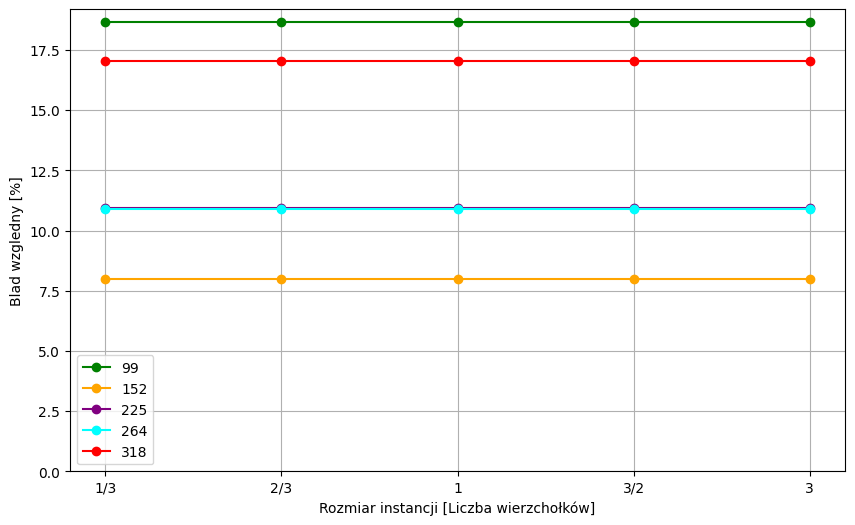

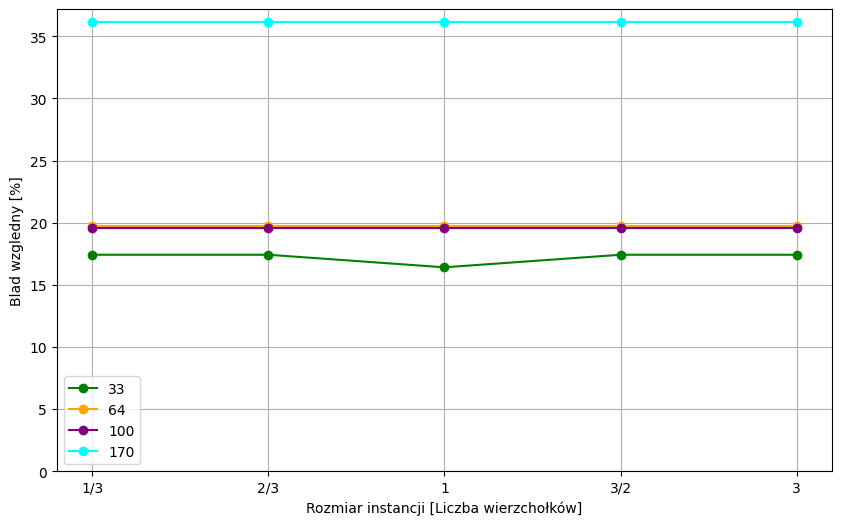

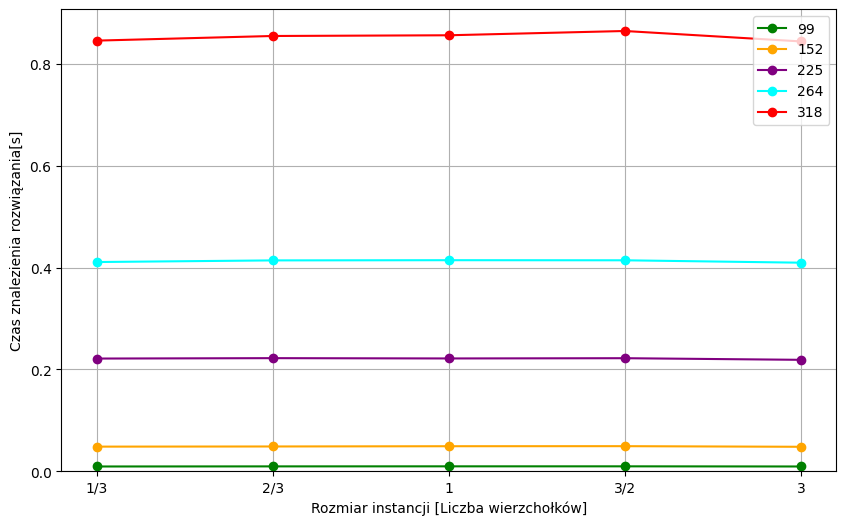

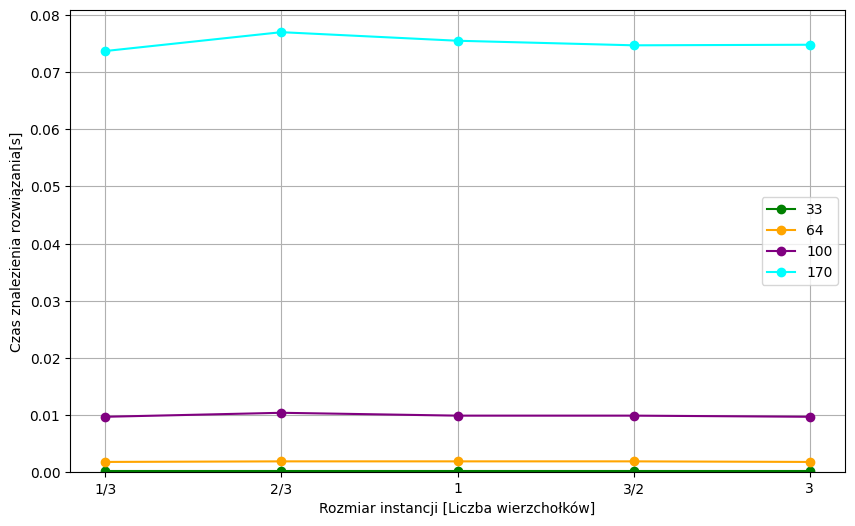

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


20
          Symetryczne                                        Asymetryczne  \
  Rozmiar          99    152     225     264     318     439           33   
0     QAS     18.6600 7.9800 10.9300 10.9000 17.0600 18.6700      17.4200   
1     CAS     18.6600 7.9800 10.9300 10.9000 17.0600 18.6700      17.4200   

                           
       64     100     170  
0 19.7400 19.5600 36.1900  
1 19.7400 19.5600 36.1900  
          Symetryczne                                    Asymetryczne         \
  Rozmiar          99    152    225    264    318    439           33     64   
0     QAS      0.0094 0.0485 0.2199 0.4133 0.8497 3.0378       0.0002 0.0018   
1     CAS      0.0093 0.0479 0.2180 0.4084 0.8460 3.0265       0.0002 0.0018   

                 
     100    170  
0 0.0098 0.0737  
1 0.0097 0.0737  


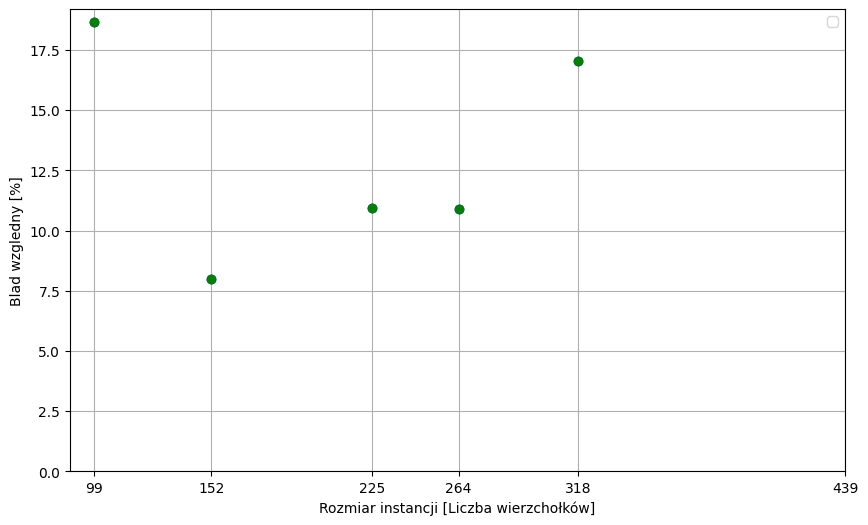

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[17.42]
[17.42]
[19.74]
[19.74]
[19.56]
[19.56]
[36.19]
[36.19]


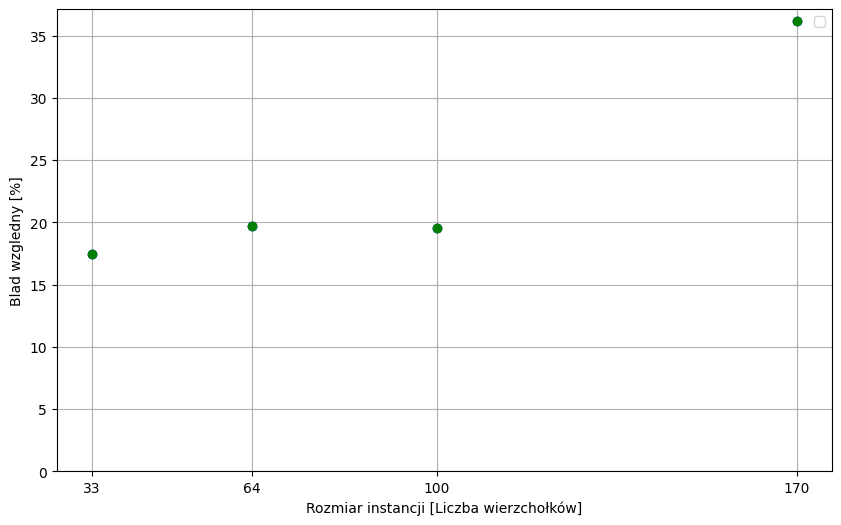

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


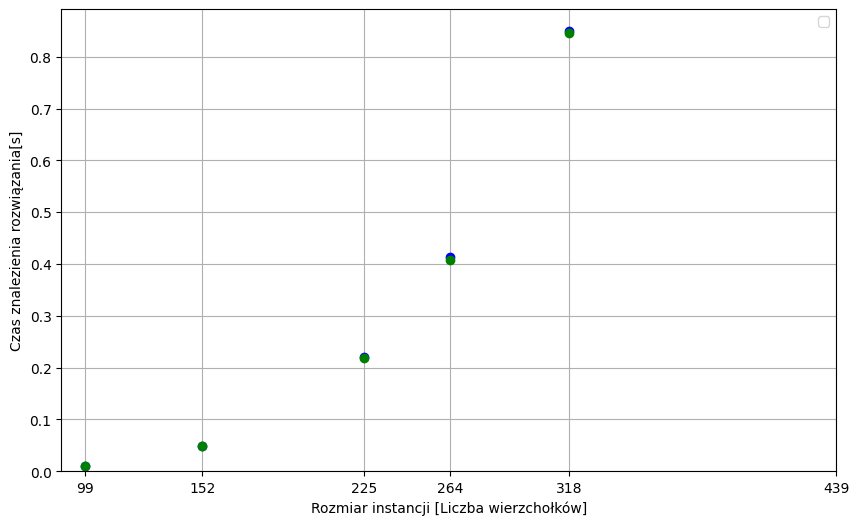

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.0002]
[0.0002]
[0.0018]
[0.0018]
[0.0098]
[0.0097]
[0.0737]
[0.0737]


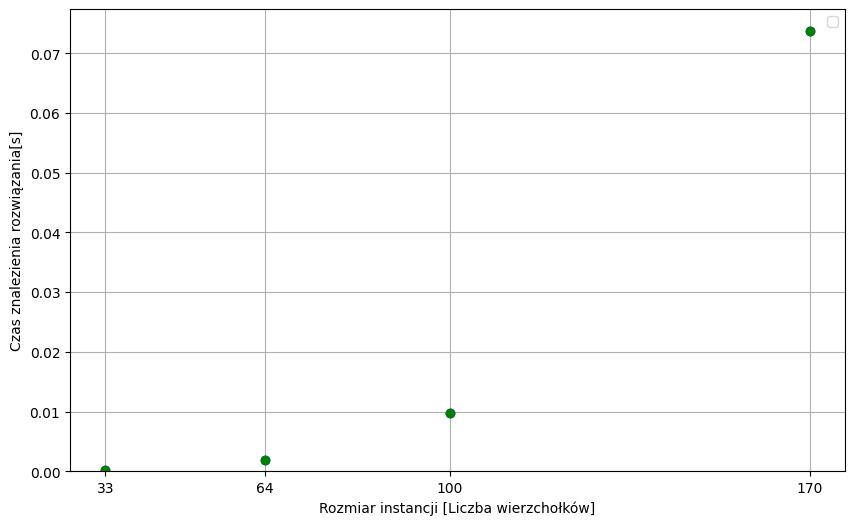

50
          Symetryczne                                        Asymetryczne  \
  Rozmiar          99    152     225     264     318     439           33   
0  0.1000     18.6600 7.9800 10.9300 10.9000 17.0600 18.6700      17.4200   
1  0.2000     18.6600 7.9800 10.9300 10.9000 17.0600 18.6700      17.4200   
2  0.3000     18.6600 7.9800 10.9300 10.9000 17.0600 18.6700      17.4200   
3  0.4000     18.6600 7.9800 10.9300 10.9000 17.0600 18.6700      17.4200   
4  0.5000     18.6600 7.9800 10.9300 10.9000 17.0600 18.6700      17.4200   

                           
       64     100     170  
0 19.7400 19.5600 36.1900  
1 19.7400 19.5600 36.1900  
2 19.7400 19.5600 36.1900  
3 19.7400 19.5600 36.1900  
4 19.7400 19.5600 36.1900  
          Symetryczne                                    Asymetryczne         \
  Rozmiar          99    152    225    264    318    439           33     64   
0  0.1000      0.0094 0.0487 0.2206 0.4095 0.8506 3.0190       0.0002 0.0018   
1  0.2000      0.0093

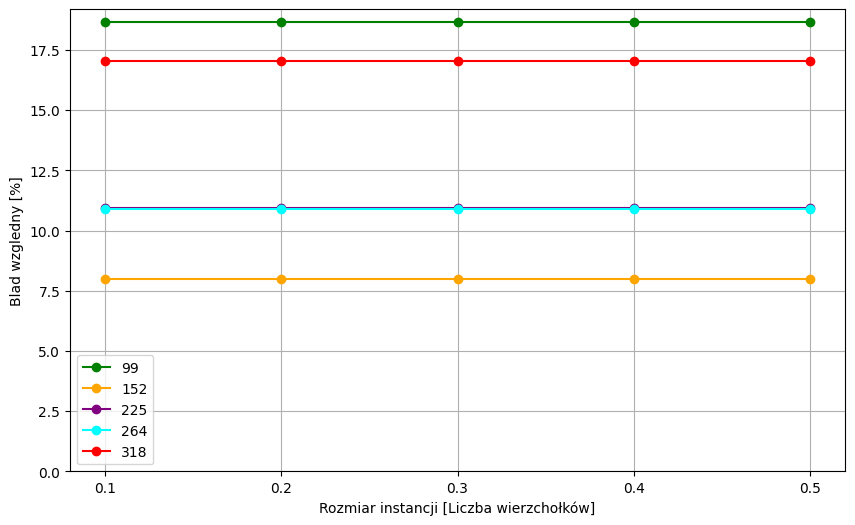

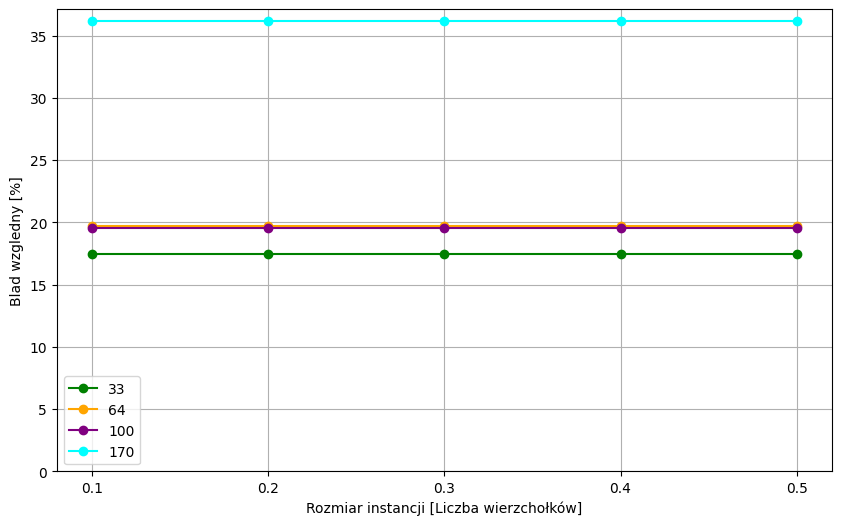

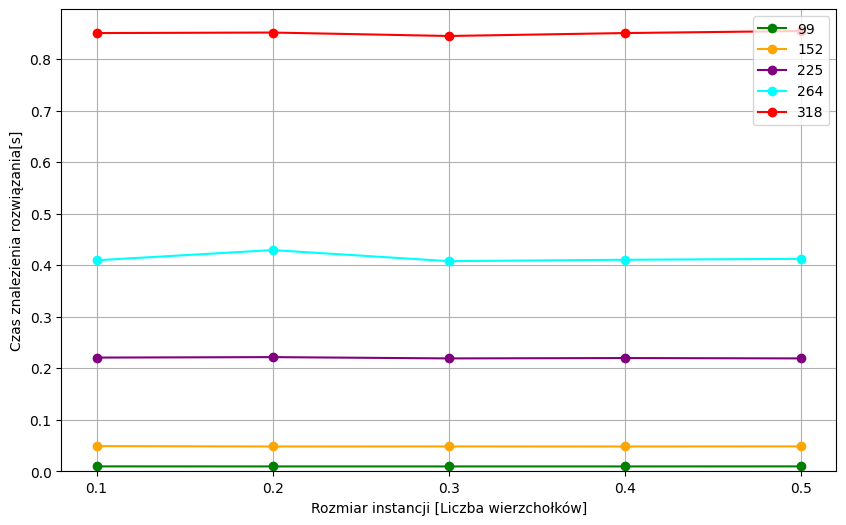

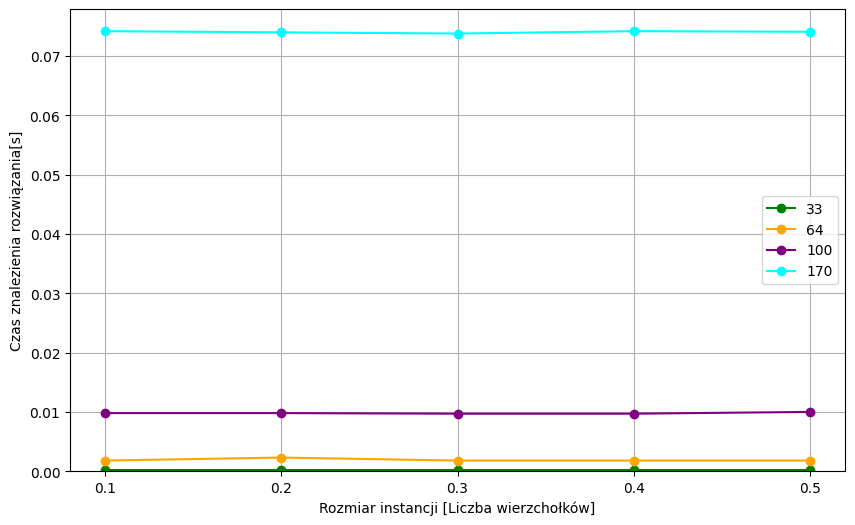

In [72]:
#Create Mean execute time tables
time_frames = {}
files = 0
# table1 = [0.19,0.39,0.59,0.79,0.99]
# table2 = [20,40,60,80,100]
# table3 = ["NN","Random"]
# table4 = [1000,2000,3000,4000,5000]
# table5 = ["Swap","Insert"]
['AnAlpha.csv', 'AnEpoch.csv', 'AnNeigMet.csv', 'AnStart.csv', 'AnStartVal.csv']

table1 = ["1/3","2/3","1","3/2","3"]
table2 = ["QAS","CAS"]
table3 = [0.1,0.2,0.3,0.4,0.5]
['AoAB.csv', 'AoFeroMet.csv', 'AoRho.csv']

for file_name in file_list:
    data_frame = data_frames[file_name]
    file_name_no_ext = file_name.replace(".csv", "")
    with open(f"./src/tables/{file_name_no_ext}.tex", 'w') as file:
        pass
    err_table = base_table.copy()
    time_table = base_table.copy()
    j = 0
    i = 0
    if(files == 0): label = table1
    if(files == 1): label = table2
    if(files == 2): label = table3
    # if(files == 3): label = table4
    # if(files == 4): label = table5
    files +=1
    for k in range(0,len(label)):
        err_table.at[k,("","Rozmiar")] = label[k]
        time_table.at[k,("","Rozmiar")] = label[k]
    print(len(data_frame))
    for start in range(0, len(data_frame), INSTANCES):
        end = start + INSTANCES
        selected_data = data_frame.iloc[start:end]
        average_error = selected_data["Blad wzgledny (procentowo)"].mean()
        average_time  = selected_data["Czas wykonania"].mean()
        err_table.at[i, column_list[j]] = round(average_error, 2)
        time_table.at[i, column_list[j]] = round(average_time, 4)
        j += 1
        if j>9:
            j = 0
            i += 1
    pd.options.display.float_format = '{:.4f}'.format
    print(err_table)
    print(time_table)
    save_to_latex(err_table,file_name_no_ext+".tex","Błędy w wynikach algorytmu dla macierzy symetrycznych i niesymetrycznych[%]","error_"+file_name_no_ext)
    save_to_latex(time_table,file_name_no_ext+"Time"+".tex","Czas znalezienia wyniku algorytmu dla macierzy symetrycznych i niesymetrycznych[s]","time_"+file_name_no_ext)
    if(len(err_table)!=2):
        createPlot(err_table,file_name,label,"Blad wzgledny [%]")
        createPlot(time_table,file_name+"Time",label,"Czas znalezienia rozwiązania[s]")
    else:
        createPlot2(err_table,file_name,label,"Blad wzgledny [%]")
        createPlot2(time_table,file_name+"Time",label,"Czas znalezienia rozwiązania[s]")
    

In [27]:
#Print whole csv
for name, df in data_frames.items():
    print(f"Data from {name}:")
    print(df.to_string())

Data from finalresoult.csv:
     Optymalny wynik Optymalna scieżka Otrzymany wynik        Otrzymana scieżka  Czas wykonania  Blad bezwzgledny  Blad wzgledny (liczbowo) Blad wzgledny (procentowo)
0   \Dane\Adam11.txt        tabuSearch           false                      NaN             NaN               NaN                       NaN                        NaN
1                149               NaN             153  11-2-3-7-8-1-5-4-10-9-6     18244500.00              4.00                      0.03                  2.684564%
2                149               NaN             153  11-2-3-7-8-1-5-4-10-9-6     17726200.00              4.00                      0.03                  2.684564%
3                149               NaN             153  11-2-3-7-8-1-5-4-10-9-6     18014500.00              4.00                      0.03                  2.684564%
4                149               NaN             153  11-2-3-7-8-1-5-4-10-9-6     18187300.00              4.00                      0.